In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
house_size = np.array([1.,2.,3.])
house_size

array([1., 2., 3.])

In [5]:
def prediction(theta_0, theta_1, x):
    """주어진 학습 데이터 벡터 x에 대해서 모든 예측 값을 벡터로 리턴하는 함수"""
    return theta_0 + theta_1 * x

# 입력 변수 (집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

theta_0 = -3
theta_1 = 2

prediction(theta_0, theta_1, house_size)


array([-1.2, -0.2,  1. ,  1.2,  2.2,  3.6,  3.7,  4.8,  5.8,  6.4,  7.4,
        8.5, 10.4, 10.8])

In [6]:
def prediction_difference(theta_0, theta_1, x, y):
    """모든 예측 값들과 목표 변수들의 오차를 벡터로 리턴해 주는 함수"""
    return prediction(theta_0, theta_1, x) - y 

In [7]:
# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

# 목표 변수(집 가격) 초기화 (모든 집 값 데이터를 1/10 크기로 줄임)
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

theta_0 = -3
theta_1 = 2

prediction_difference(-3, 2, house_size, house_price)

array([-1.5 , -0.95,  0.55,  0.1 ,  0.75,  2.7 ,  1.9 ,  3.9 ,  4.3 ,
        4.2 ,  5.65,  6.2 ,  7.91,  8.2 ])

In [19]:
def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):

    m = len(x)
    cost_list = [] #손실을 저장하는 리스트, 경가 하강을 할 때마다 그 시점에서의 손실을 여기에 저장할께요.
    # 손실을 계산하려면, 오차를 제곱하고 그 오차들을 모두 더한 다음에 2m으로 나눠야 합니다.

    """주어진 theta_0, theta_1 변수들을 경사 하강을 하면서 업데이트 해 주는 함수"""

    for i in range(iterations): # 정해진 번만큼 경사 하강을 한다.
        error = prediction_difference(theta_0, theta_1, x, y)   # 예측값들과 입력 변수들의 오차를 계산
        # error는 모든 오차가 담겨 있는 벡터이다.
        # 모든 오차를 제곱하고 더하고 싶으면
        cost = (error@error) / (2*m)
        cost_list.append(cost)

        theta_0 = theta_0 - alpha*error.mean()
        theta_1 = theta_1 - alpha*(error*x).mean()

        if i % 10 == 0 :
            # 산점도를 그릴께요.
            # X축에는 집크기, Y축에는 집가격
            plt.scatter(house_size, house_price)
            # 같은 곳에 가설 함수를 그린다.
            plt.plot(house_size, prediction(theta_0, theta_1, x), color='red')
            plt.show()
            # 가설함수가 데이터에 점점 맞춰가는 지는 것을 확인 할 수 있습니다. 


    return theta_0, theta_1, cost_list 
        

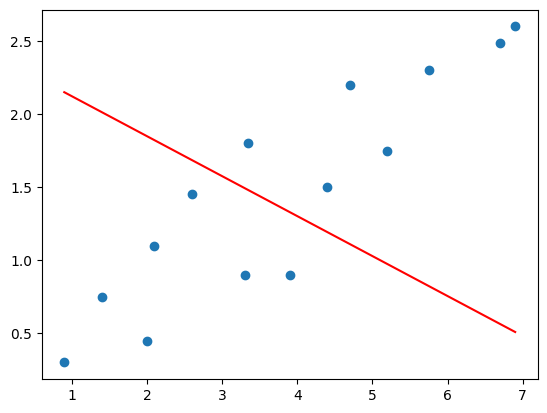

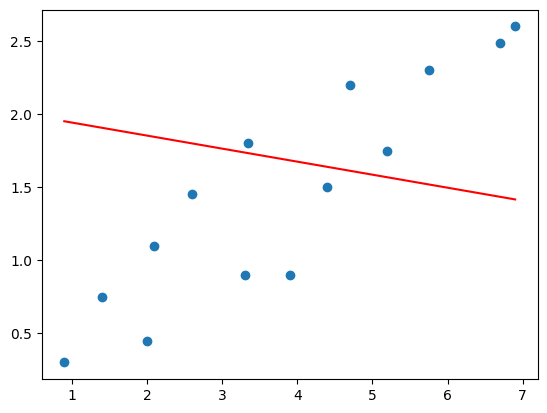

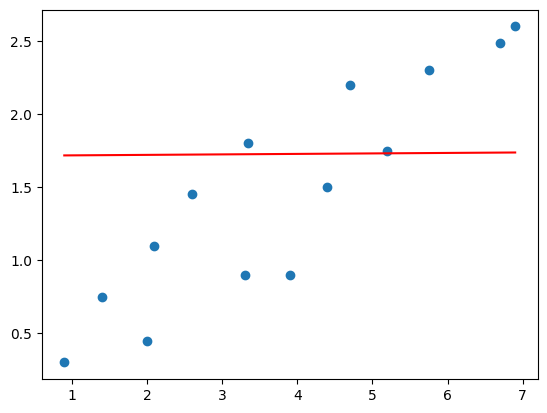

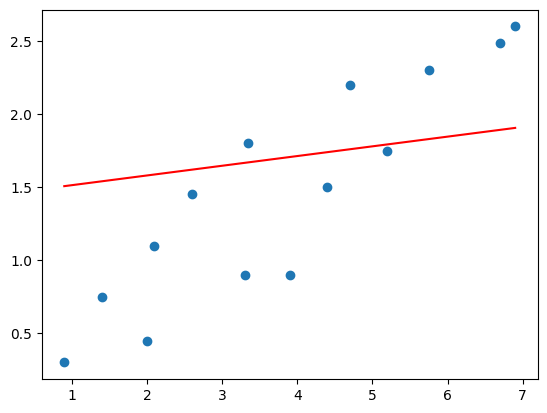

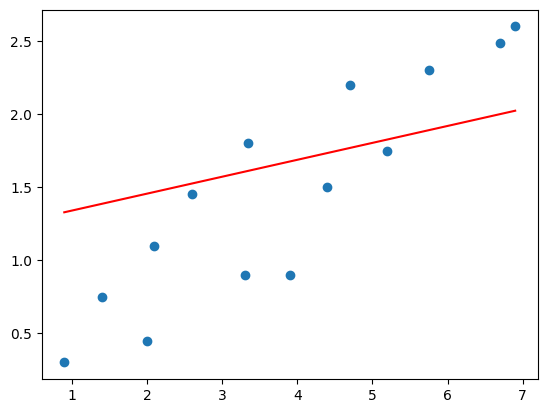

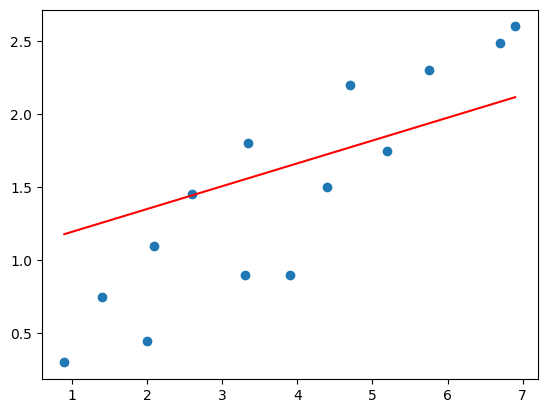

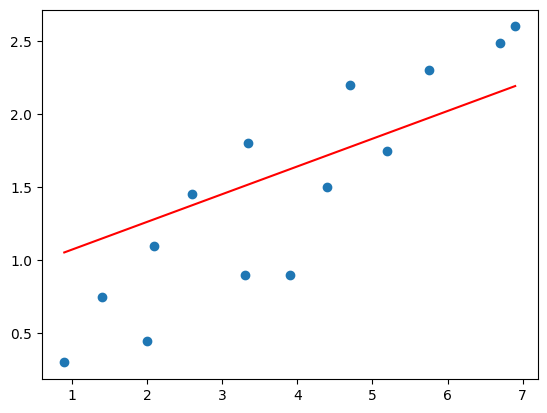

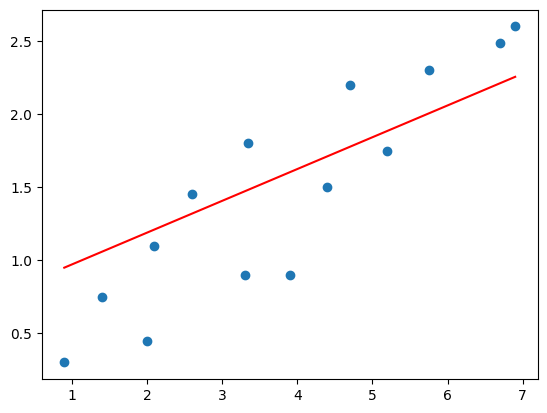

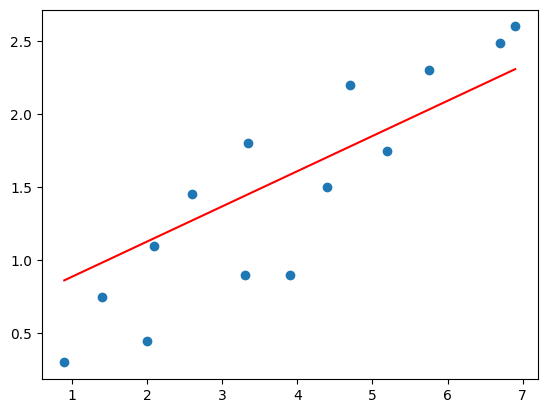

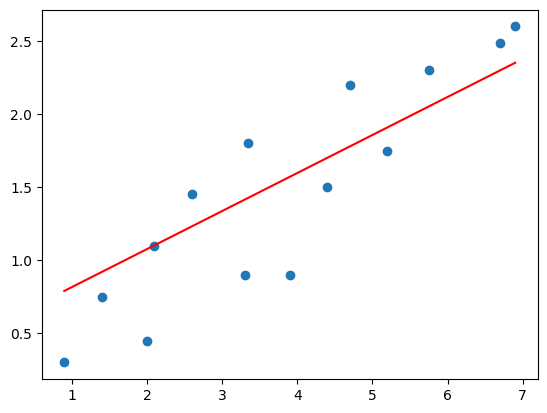

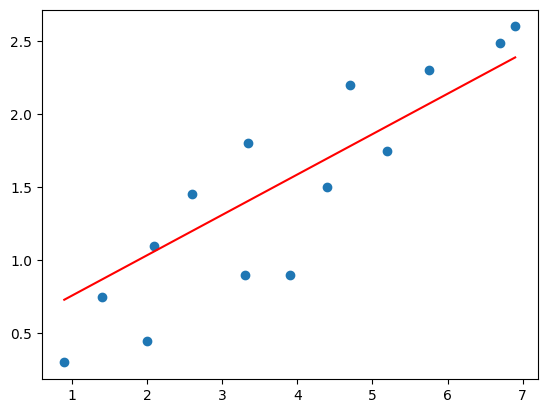

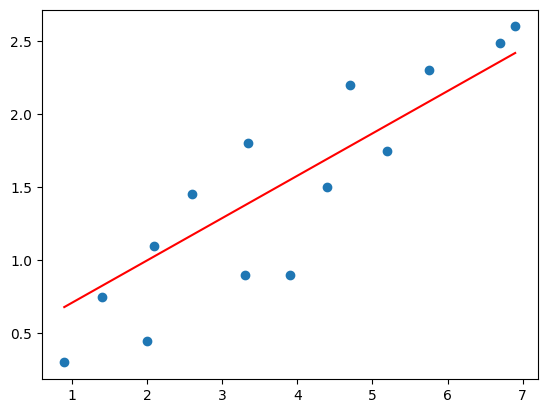

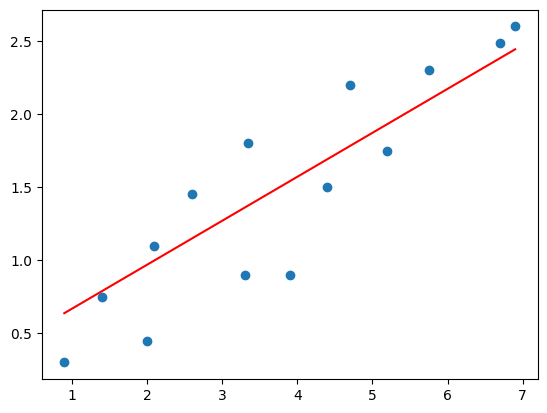

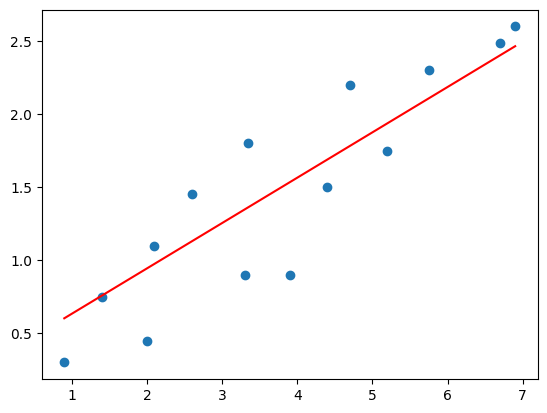

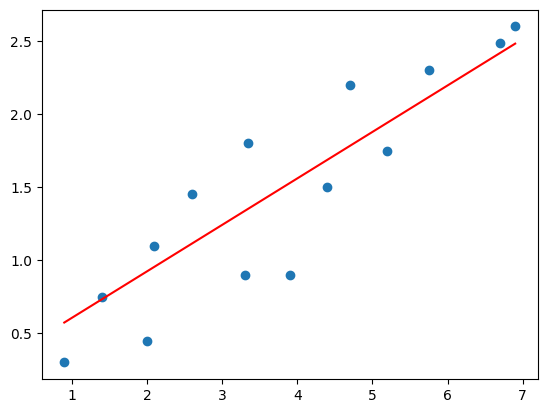

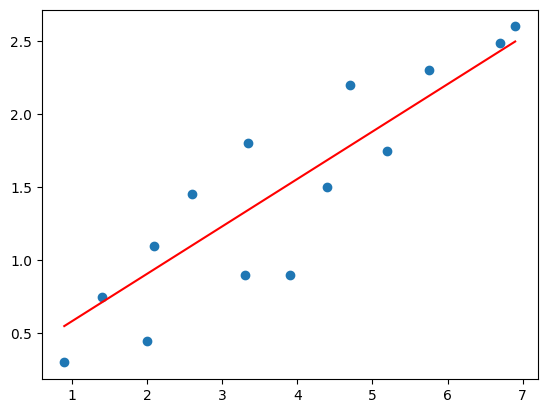

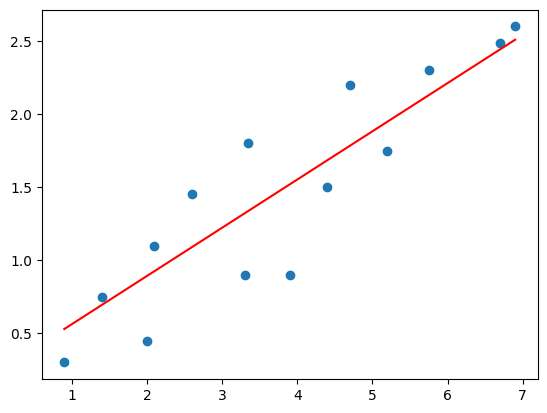

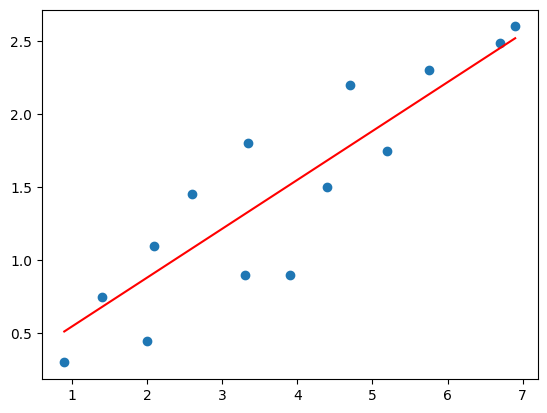

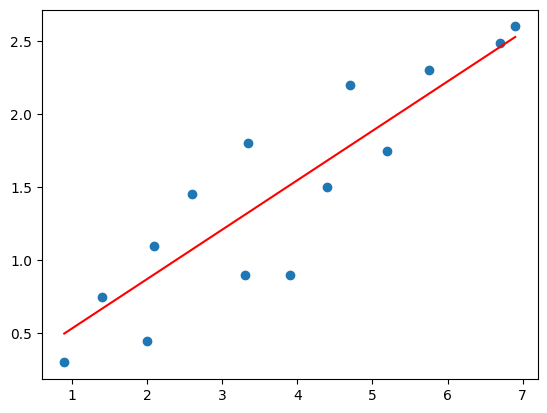

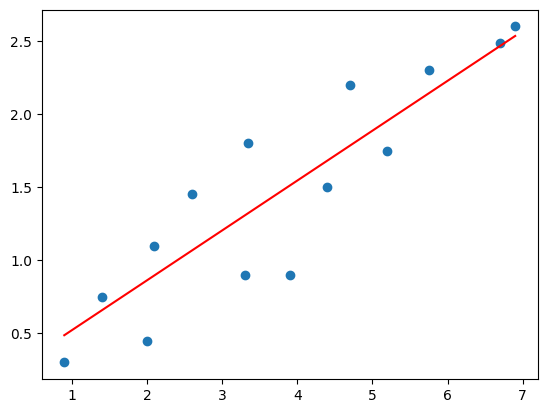

(np.float64(0.16821801417752186), np.float64(0.3438032402351199))

In [21]:
# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

# 목표 변수(집 가격) 초기화 (모든 집 값 데이터를 1/10 크기로 줄임)
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

# theta 값들 초기화 (아무 값이나 시작함)
theta_0 = 2.5
theta_1 = 0

# 학습률 0.1로 200번 경사 하강
theta_0, theta_1, cost_list = gradient_descent(theta_0, theta_1, house_size, house_price, 200, 0.1)

theta_0, theta_1

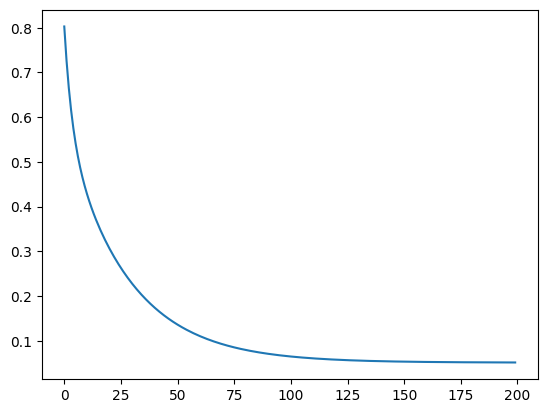

In [20]:
# 경사 하강을 할 때마다, 손실이 어떻게 변하는지 한 눈으로 확인할 수 있겠죠?
# 경사 하강을 반복할 수록 손실이 이렇게 줄어드는 것을 우리 눈으로 확인할 수 있습니다.
plt.plot(cost_list)

In [ ]:
# 손실이 줄어드는 것 뿐만 아니라, 실제 가설 함수가 개선되는 모습을 시각적으로 봅시다.
# 먼저 산점도를 그릴께요.
